# Requirements

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [ ]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Solution

In [63]:
browser = webdriver.Chrome(options=options)
browser.get('https://www.scrapethissite.com/pages/forms/')
print(browser.current_url)

https://www.scrapethissite.com/pages/forms/


In [155]:
teams = browser.find_elements(By.CLASS_NAME, 'team')
name=teams[0].find_element(By.CLASS_NAME, 'name').text
wins=teams[0].find_element(By.CLASS_NAME, 'wins').text
losses=teams[0].find_element(By.CLASS_NAME, 'losses').text
year=teams[0].find_element(By.CLASS_NAME, 'year').text
name,year,wins,losses

('Detroit Red Wings', '1991', '43', '25', '')

In [65]:
all_teams=[]
for team in teams:
    name=team.find_element(By.CLASS_NAME, 'name').text
    wins=team.find_element(By.CLASS_NAME, 'wins').text
    losses=team.find_element(By.CLASS_NAME, 'losses').text
    year=team.find_element(By.CLASS_NAME, 'year').text
    team_dict={
        "Name":name,
        "Wins":wins,
        "Losses":losses,
        "Year":year
    }
    all_teams.append(team_dict)
all_teams[0]

{'Name': 'Detroit Red Wings', 'Wins': '43', 'Losses': '25', 'Year': '1991'}

In [73]:
def return_team_dict(team):
    name=team.find_element(By.CLASS_NAME, 'name').text
    wins=int(team.find_element(By.CLASS_NAME, 'wins').text)
    losses=int(team.find_element(By.CLASS_NAME, 'losses').text)
    year=int(team.find_element(By.CLASS_NAME, 'year').text)
    team_dict={
        "Name":name,
        "Wins":wins,
        "Losses":losses,
        "Year":year
    }
    return team_dict

In [75]:
base_url="https://www.scrapethissite.com/pages/forms/?page_num="
products_on_all_pages=[]
for i in range(1,3):
    url=base_url+str(i)
    browser = webdriver.Chrome(options=options)
    browser.get(url)
    teams = browser.find_elements(By.CLASS_NAME, 'team')
    for team in teams:
        result=return_team_dict(team)
        products_on_all_pages.append(result)
len(products_on_all_pages)

50

In [77]:
df=pd.DataFrame(products_on_all_pages)
df.head()

,Name,Wins,Losses,Year
0,Boston Bruins,44,24,1990
1,Buffalo Sabres,31,30,1990
2,Calgary Flames,46,26,1990
3,Chicago Blackhawks,49,23,1990
4,Detroit Red Wings,34,38,1990


In [71]:
import matplotlib.pyplot as plt

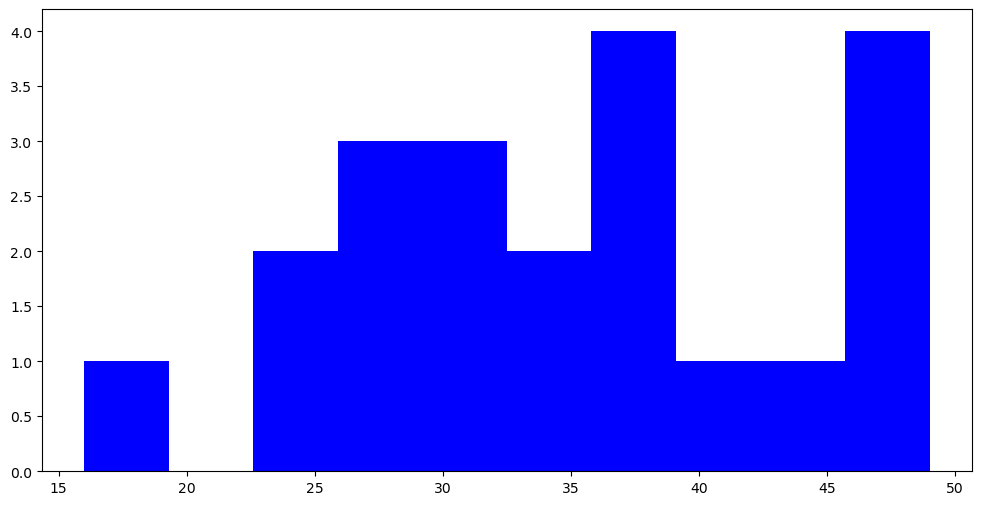

In [145]:
df_1990 = df[df['Year'] == 1990]

plt.figure(figsize=(12, 6))
plt.hist(df_1990['Wins'], bins=10, color='blue')
plt.show()

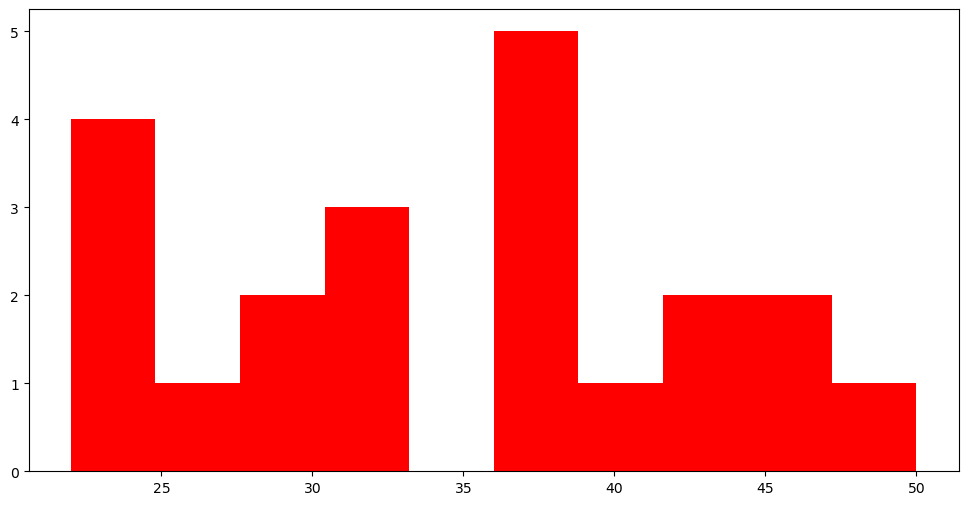

In [147]:
df_1990 = df[df['Year'] == 1990]

plt.figure(figsize=(12, 6))
plt.hist(df_1990['Losses'], bins=10, color='red')
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [195]:
browser.get("https://www.scrapethissite.com/pages/forms")
teams_from_search=[]
input_=browser.find_element(By.CSS_SELECTOR,"#q")
input_.send_keys("Boston Bruins")
button=browser.find_element(By.CSS_SELECTOR,"#hockey > div > div.row.search-area > div > form > input.btn.btn-primary")
button.click()
teams = browser.find_elements(By.CLASS_NAME, 'team')
for team in teams:
    result=return_team_dict(team)
    teams_from_search.append(result)
teams_from_search[0]

{'Name': 'Boston Bruins', 'Wins': 44, 'Losses': 24, 'Year': 1990}

In [203]:
df=pd.DataFrame(teams_from_search)
df.head()

,Name,Wins,Losses,Year
0,Boston Bruins,44,24,1990
1,Boston Bruins,36,32,1991
2,Boston Bruins,51,26,1992
3,Boston Bruins,42,29,1993
4,Boston Bruins,27,18,1994


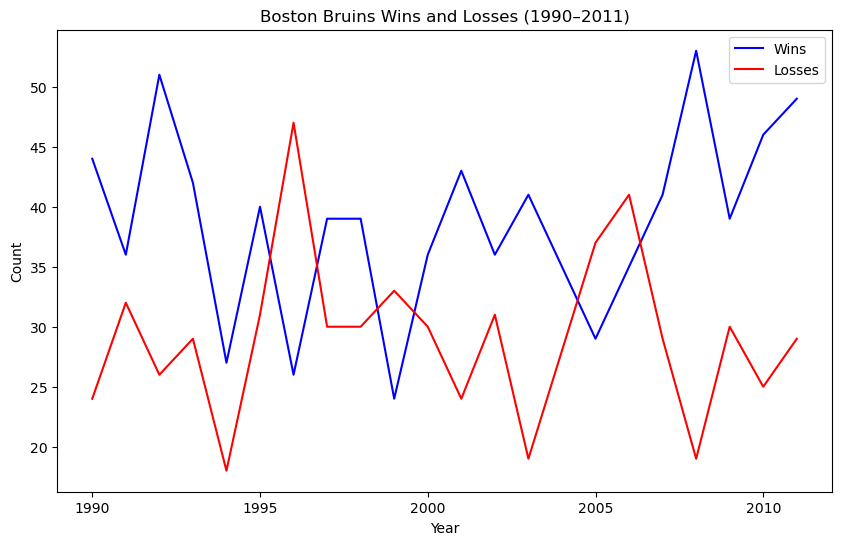

In [231]:
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Wins'], label='Wins', color='blue')
plt.plot(df['Year'], df['Losses'], label='Losses', color='red')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Boston Bruins Wins and Losses (1990–2011)')
plt.legend()
plt.show()